<a href="https://colab.research.google.com/github/LinarKulinar/Data-Analysis-Tools-SSAU/blob/main/Lab_3_Classification_6133_Akhmetov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 3**
# Классификация в sklearn. Метрики классификации

Выполнил: 6133, Ахметов Линар

# **0. Загрузка датасета**

*Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Загрузим с Githib датасет
url_columns = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/columns.csv'
url_responses = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/responses.csv'

In [3]:
df_columns = pd.read_csv(url_columns)
df_responses = pd.read_csv(url_responses)

Датасет состоит из 150 столбцов (из них 139 - целочисленных и 11 - категориальных)

Одна строка - ответ на опрос одного изх студентов факультета статистики FSEV UK (граждане Словакии от 15 до 30 лет).

Данные содержат пропуски

Все столбцы можно разделить на следующие группы:

- Музыкальные предпочтения (19 столбцов)
- Предпотения в фильмах (12 пунктов)
- Хобби и интересы (32 шт.)
- Фобии (10 шт.)
- Здоровые привычки (3 предмета)
- Черты характера, взгляды на жизнь и мнения (57 пунктов)
- Привычки (7 пунктов)
- Демографические особенности (10 элементов)

Расшифровку всех признаков можно найти на [странице датасета на kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey) в абзаце "Questionnaire"

Названия столбцов сокращены, маппинг формулировки вопроса и сокращенного названия можно найти в таблице `df_columns`

In [4]:
df_responses

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [5]:
# Узнаем название столбца в таблице df_responses по названию 'Drinking' из описания датасета 
df_columns[df_columns['original']=='Drinking']

,original,short
74,Drinking,Alcohol


In [6]:
data = df_responses[['Age', 'Height',	'Weight', 'Music', 'Movies', 'Smoking', 'Alcohol', 'Healthy eating', 'Number of siblings', 'Village - town', 'House - block of flats', 'Only child', 'Education']]
data = data.dropna()
data

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,never smoked,drink a lot,4.0,1.0,village,block of flats,no,college/bachelor degree
1,19.0,163.0,58.0,4.0,5.0,never smoked,drink a lot,3.0,2.0,city,block of flats,no,college/bachelor degree
2,20.0,176.0,67.0,5.0,5.0,tried smoking,drink a lot,3.0,2.0,city,block of flats,no,secondary school
3,22.0,172.0,59.0,5.0,5.0,former smoker,drink a lot,3.0,1.0,city,house/bungalow,yes,college/bachelor degree
4,20.0,170.0,59.0,5.0,5.0,tried smoking,social drinker,4.0,1.0,village,house/bungalow,no,secondary school
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,164.0,57.0,5.0,5.0,current smoker,drink a lot,3.0,1.0,city,house/bungalow,no,secondary school
1006,27.0,183.0,80.0,4.0,5.0,never smoked,social drinker,3.0,5.0,village,house/bungalow,no,masters degree
1007,18.0,173.0,75.0,4.0,4.0,tried smoking,social drinker,2.0,0.0,city,block of flats,yes,secondary school
1008,25.0,173.0,58.0,5.0,5.0,tried smoking,social drinker,3.0,1.0,city,block of flats,no,college/bachelor degree


### Кодируем категориальные признаки с помощью Label-Encoding

Кодируем столбец `Smoking`

In [7]:
from sklearn import preprocessing

le_smoking = preprocessing.LabelEncoder()
le_smoking.fit(data['Smoking'])
le_smoking.classes_

array(['current smoker', 'former smoker', 'never smoked', 'tried smoking'],
      dtype=object)

In [8]:
# data['Smoking'] = le_smoking.transform(data['Smoking'])

# Тупо хардкодим признаки т.к. они неверно посортированы в le_smoking.classes_
data['Smoking'] = data['Smoking'].apply(lambda x: ['never smoked', 'tried smoking', 'former smoker', 'current smoker'].index(x))
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,drink a lot,4.0,1.0,village,block of flats,no,college/bachelor degree


Кодируем столбец `Alcohol`

In [9]:
le_alcohol = preprocessing.LabelEncoder()
le_alcohol.fit(data['Alcohol'])
le_alcohol.classes_

array(['drink a lot', 'never', 'social drinker'], dtype=object)

In [10]:
# data['Alcohol'] = le_alcohol.transform(data['Alcohol'])

# Тупо хардкодим признаки т.к. они неверно посортированы в le_alcohol.classes_
data['Alcohol'] = data['Alcohol'].apply(lambda x: ['never', 'social drinker', 'drink a lot'].index(x))
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,village,block of flats,no,college/bachelor degree


Кодируем столбец `Village - town`

In [11]:
le_village = preprocessing.LabelEncoder()
le_village.fit(data['Village - town'])
le_village.classes_

array(['city', 'village'], dtype=object)

In [12]:
data['Village - town'] = le_village.transform(data['Village - town'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,1,block of flats,no,college/bachelor degree


Кодируем столбец `House - block of flats`

In [13]:
le_house = preprocessing.LabelEncoder()
le_house.fit(data['House - block of flats'])
le_house.classes_

array(['block of flats', 'house/bungalow'], dtype=object)

In [14]:
data['House - block of flats'] = le_house.transform(data['House - block of flats'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,1,0,no,college/bachelor degree


Кодируем столбец `Only child`

In [15]:
le_only_child = preprocessing.LabelEncoder()
le_only_child.fit(data['Only child'])
le_only_child.classes_

array(['no', 'yes'], dtype=object)

In [16]:
data['Only child'] = le_only_child.transform(data['Only child'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,1,0,0,college/bachelor degree


Анализуем целевой класс `Education`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


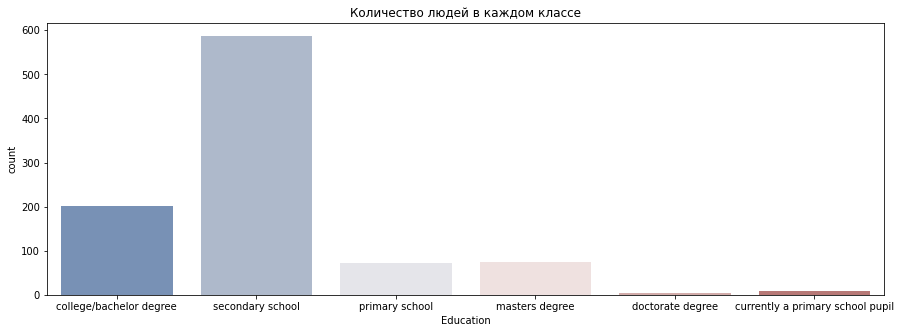

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data['Education'], palette='vlag')
ax.set(title='Количество людей в каждом классе')
plt.show()

In [18]:
# Отфильтровываем слишком мелкие классы
data = data[data['Education']!='doctorate degree']
data = data[data['Education']!='currently a primary school pupil']
data.head(3)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,1,0,0,college/bachelor degree
1,19.0,163.0,58.0,4.0,5.0,0,2,3.0,2.0,0,0,0,college/bachelor degree
2,20.0,176.0,67.0,5.0,5.0,1,2,3.0,2.0,0,0,0,secondary school


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


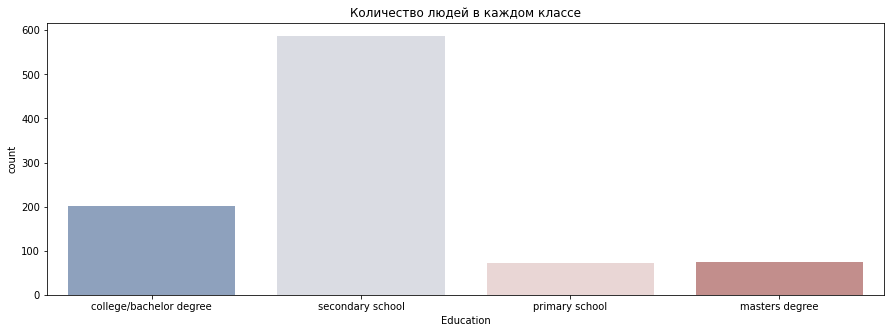

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data['Education'], palette='vlag')
ax.set(title='Количество людей в каждом классе')
plt.show()

Кодируем целевой столбец `Education`

In [20]:
le_education = preprocessing.LabelEncoder()
le_education.fit(data['Education'])
le_education.classes_

array(['college/bachelor degree', 'masters degree', 'primary school',
       'secondary school'], dtype=object)

In [21]:
# data['Education'] = le_education.transform(data['Education'])
# data.head(1)

In [22]:
# Тупо хардкодим признаки т.к. они неверно посортированы в le_education.classes_ и нам 
data['Education'] = data['Education'].apply(lambda x: ['primary school', 'secondary school', 'college/bachelor degree', 'masters degree'].index(x))
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,0,2,4.0,1.0,1,0,0,2


### Изучим корреляцию между признаками

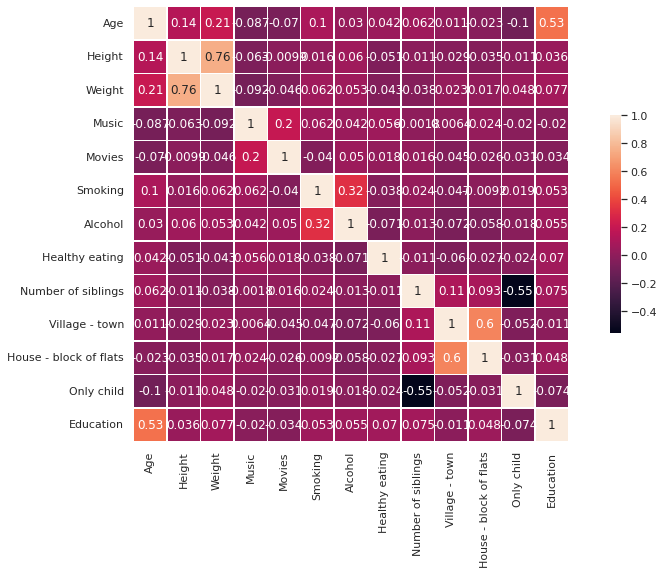

In [23]:
sns.set(rc={"figure.figsize":(15, 8)})


corr = data.corr(method='spearman')
sns.heatmap(corr, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=True)

Видно существенную корреляцию между возрастом и уровнем образования

# **1. Многоклассовая классификация:**

*1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.*

*1.2. То же самое с использованием кросс-валидации*

*1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)*

*1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):*

### Без нормализации

In [24]:
import sklearn
import sklearn.neighbors
from sklearn.metrics import r2_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
# Split Targets and Features
y = data['Education']
X = data.drop(['Education'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

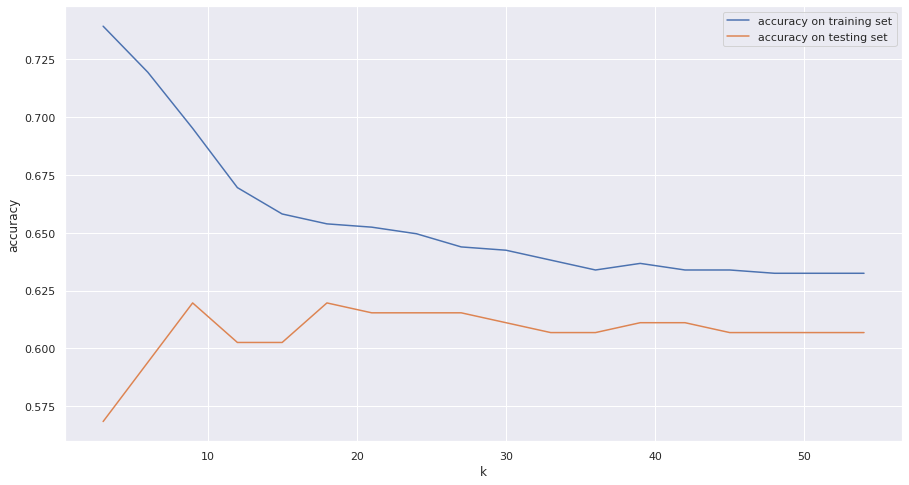

In [27]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(3, 55, 3)
for n_neighbors in neighbors_settings:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train, y_train )
    training_accuracy.append( clf.score(X_train, y_train) )
    test_accuracy.append( clf.score(X_test, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

### С нормализацией

In [28]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [29]:
X_train.head(2)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child
827,20.0,168.0,55.0,5.0,4.0,1,2,4.0,1.0,0,0,0
836,19.0,187.0,88.0,5.0,5.0,1,1,3.0,0.0,0,0,1


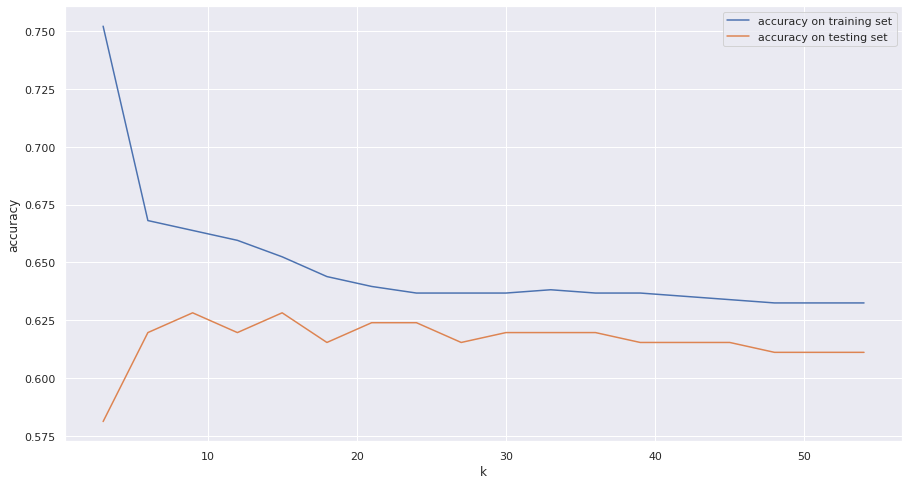

In [30]:
training_accuracy_n = []
test_accuracy_n = []

neighbors_settings_n = range(3, 55, 3)
for n_neighbors in neighbors_settings_n:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train_n, y_train )
    training_accuracy_n.append( clf.score(X_train_n, y_train) )
    test_accuracy_n.append( clf.score(X_test_n, y_test) )

plt.plot( neighbors_settings_n, training_accuracy_n, label="accuracy on training set" )
plt.plot( neighbors_settings_n, test_accuracy_n, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

Маскимальное значение accuracy без нормализации 0.6197
Маскимальное значение accuracy после нормализации 0.6282


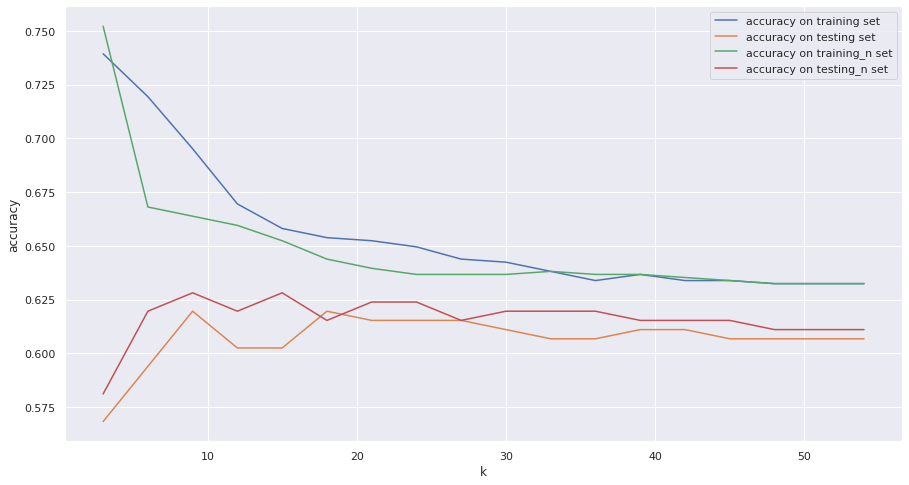

In [31]:
plt.plot( neighbors_settings, training_accuracy, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy, label="accuracy on testing set" )
plt.plot( neighbors_settings_n, training_accuracy_n, label="accuracy on training_n set" )
plt.plot( neighbors_settings_n, test_accuracy_n, label="accuracy on testing_n set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()
print("Маскимальное значение accuracy без нормализации %.4f" % max(test_accuracy))
print("Маскимальное значение accuracy после нормализации %.4f" % max(test_accuracy_n))

Accuracy в среднем для нормализованных данных немного лучше чем для ненормализованных.

Связываю с тем, что в исходных данных нет выбросов - это опросник в котором пользователи выбирали конечное число вариантов ответов.

Выберем лучшиее значение гиперпараметра и выведем `classification_report` и `confusion_matrix`

In [32]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_n, y_train)
predictions = knn.predict(X_test_n)

In [33]:
print("kNN")
print(classification_report(y_test, predictions))

kNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.64      0.95      0.76       143
           2       0.40      0.08      0.13        53
           3       0.88      0.33      0.48        21

    accuracy                           0.63       234
   macro avg       0.48      0.34      0.34       234
weighted avg       0.56      0.63      0.54       234



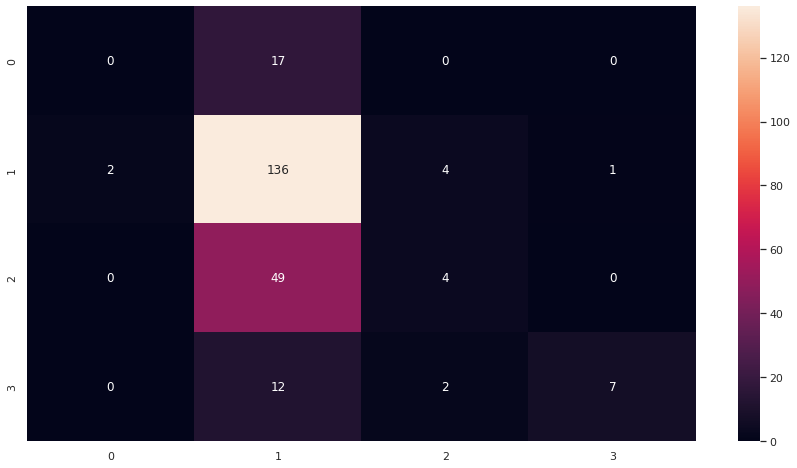

In [34]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d")

# **2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


### Без нормализации

In [35]:
# Узнаем название столбца в таблице df_responses по названию 'I wish I could change the past because of the things I have done.' из описания датасета 
df_columns[df_columns['original']=='I wish I could change the past because of the things I have done.']

,original,short
102,I wish I could change the past because of the ...,Changing the past


In [36]:
# Получим названия столбцов в df_responses, которые соответвуют разделу "PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS"
list_columns_personality_trails = df_columns.iloc[76:76+57]['short'].tolist()
list_columns_personality_trails.remove("Changing the past")
list_columns_personality_trails.remove("Punctuality")
list_columns_personality_trails.remove("Lying")
list_columns_personality_trails.remove("Internet usage")
list_columns_personality_trails.append("Village - town")

In [37]:
data_binary = df_responses[list_columns_personality_trails]
data_binary = data_binary.dropna()
data_binary.head(1)

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Village - town
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,village


Кодируем целевой бинарный столбец `Village - town`

In [38]:
le_village_binary = preprocessing.LabelEncoder()
le_village_binary.fit(data_binary['Village - town'])
le_village_binary.classes_

array(['city', 'village'], dtype=object)

In [39]:
data_binary['Village - town'] = le_village_binary.transform(data_binary['Village - town'])
data_binary.head(1)

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Village - town
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,1


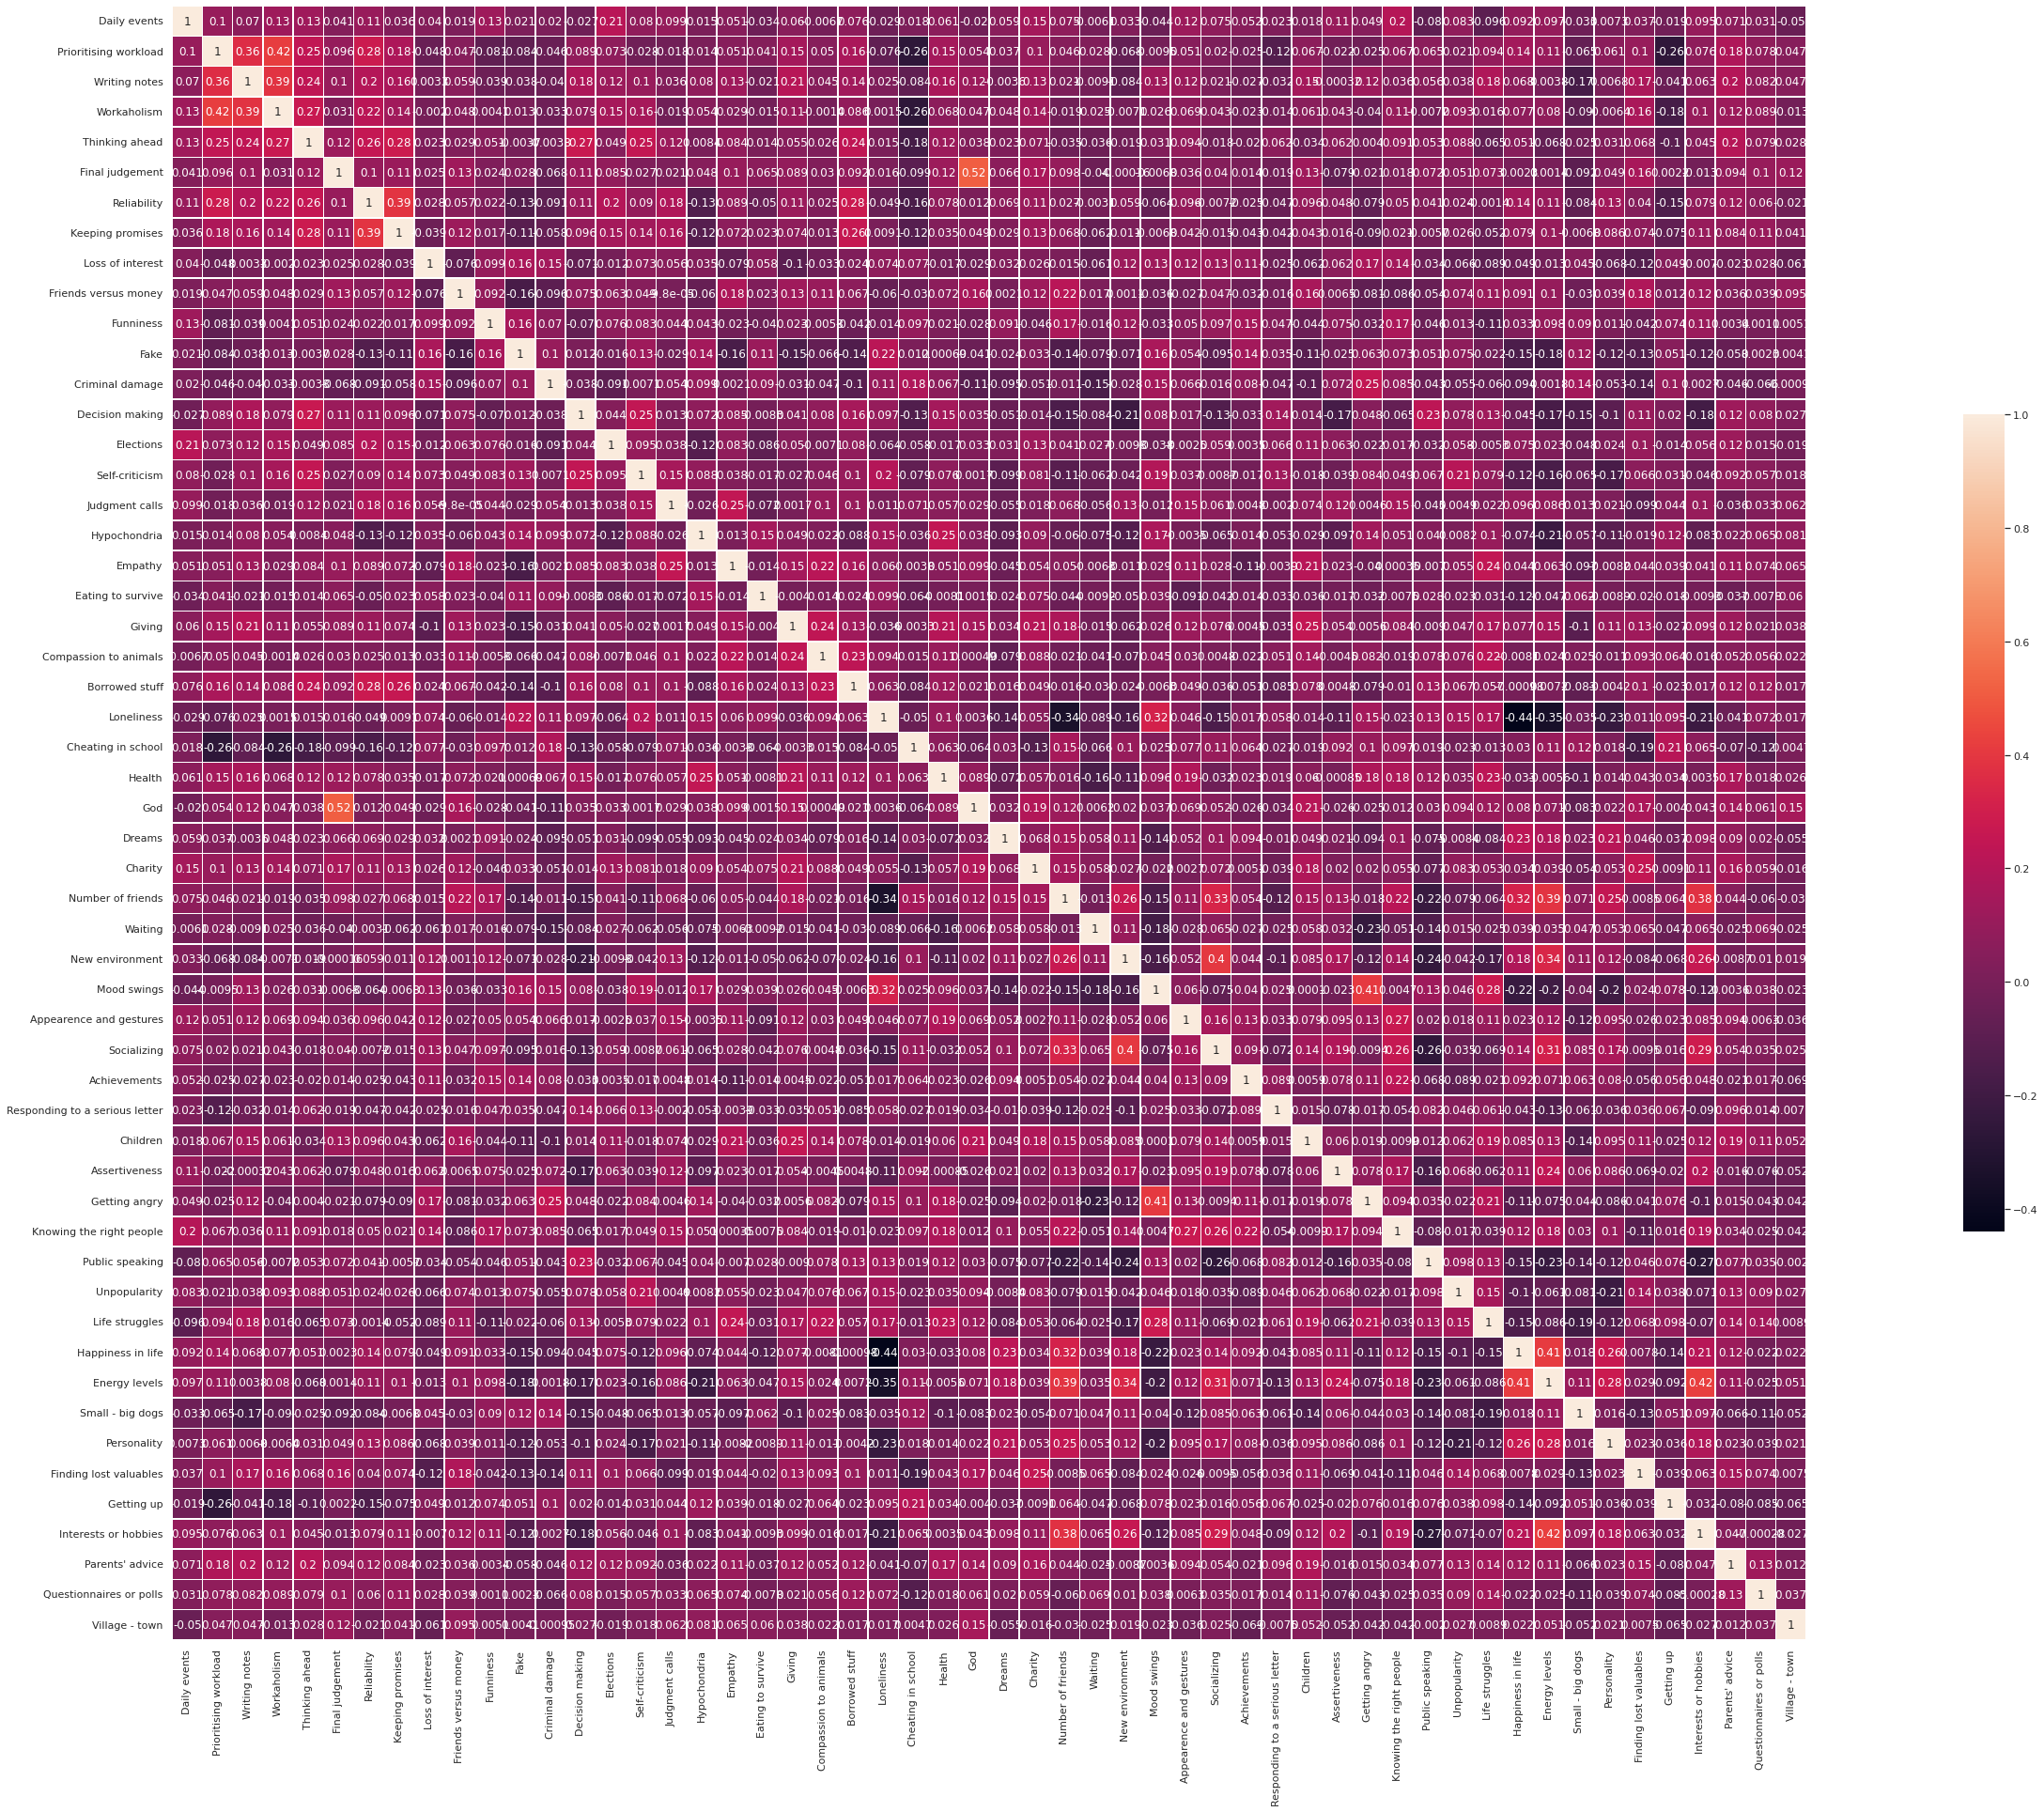

In [40]:
sns.set(rc={"figure.figsize":(60, 32)})


corr_binary = data_binary.corr(method='spearman')
sns.heatmap(corr_binary, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=True)

In [41]:
# Вернем обратно адекватный размер поля sns
sns.set(rc={"figure.figsize":(15, 8)})

Тут много интересных и очевидных корреляций можно найти)


Из не столь очевидных корреляций: *Согласие с утверждением "Я ипохондрик." скоррелировано с согласием на утверждением "Я могу очень легко разозлиться." с коэфф корреляции Спирмана = 0.14*

Сколь существенной корреляции в данных с целевым полем `Village - town` нет

In [42]:
# Split Targets and Features
y_binary = data_binary['Village - town']
X_binary = data_binary.drop(['Village - town'], axis=1)

In [43]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = sklearn.model_selection.train_test_split(
    X_binary, y_binary, test_size=0.25, random_state=1)

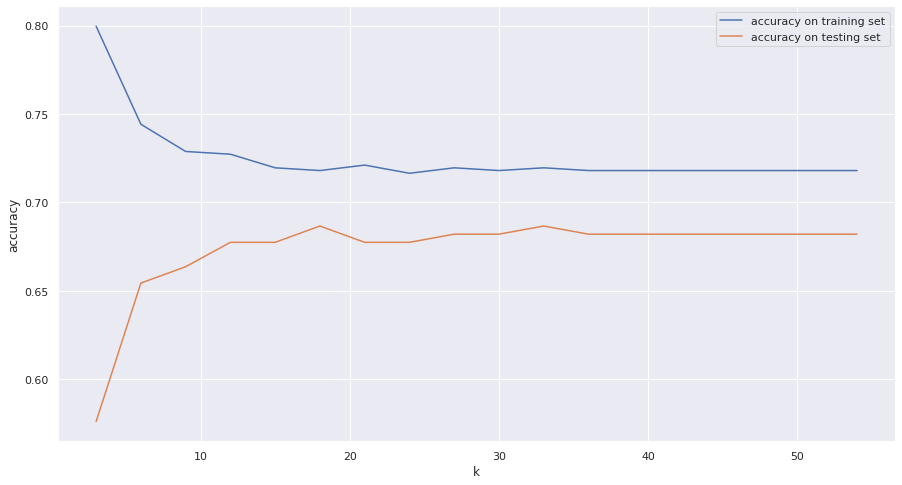

In [44]:


training_accuracy_binary = []
test_accuracy_binary = []

neighbors_settings_binary = range(3, 55, 3)
for n_neighbors in neighbors_settings_binary:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train_binary, y_train_binary )
    training_accuracy_binary.append( clf.score(X_train_binary, y_train_binary) )
    test_accuracy_binary.append( clf.score(X_test_binary, y_test_binary) )

plt.plot( neighbors_settings_binary, training_accuracy_binary, label="accuracy on training set" )
plt.plot( neighbors_settings_binary, test_accuracy_binary, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

### С нормализацией

In [45]:
scaler = MinMaxScaler()
X_train_binary_n = scaler.fit_transform(X_train_binary)
X_test_binary_n = scaler.transform(X_test_binary)

In [46]:
X_train.head(2)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child
827,20.0,168.0,55.0,5.0,4.0,1,2,4.0,1.0,0,0,0
836,19.0,187.0,88.0,5.0,5.0,1,1,3.0,0.0,0,0,1


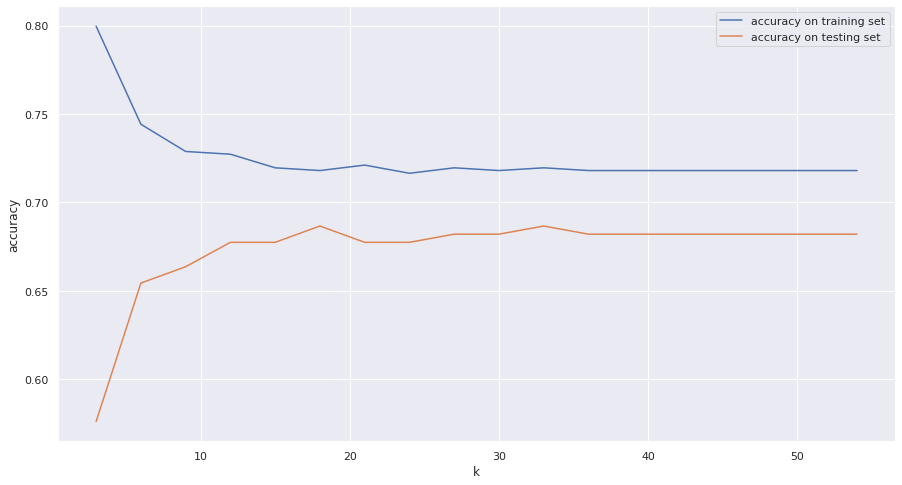

In [47]:
training_accuracy_binary_n = []
test_accuracy_binary_n = []

neighbors_settings_binary_n = range(3, 55, 3)
for n_neighbors in neighbors_settings_binary_n:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train_binary_n, y_train_binary )
    training_accuracy_binary_n.append( clf.score(X_train_binary_n, y_train_binary) )
    test_accuracy_binary_n.append( clf.score(X_test_binary_n, y_test_binary) )

plt.plot( neighbors_settings_binary_n, training_accuracy_binary_n, label="accuracy on training set" )
plt.plot( neighbors_settings_binary_n, test_accuracy_binary_n, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

Маскимальное значение accuracy без нормализации 0.6866
Маскимальное значение accuracy после нормализации 0.6866


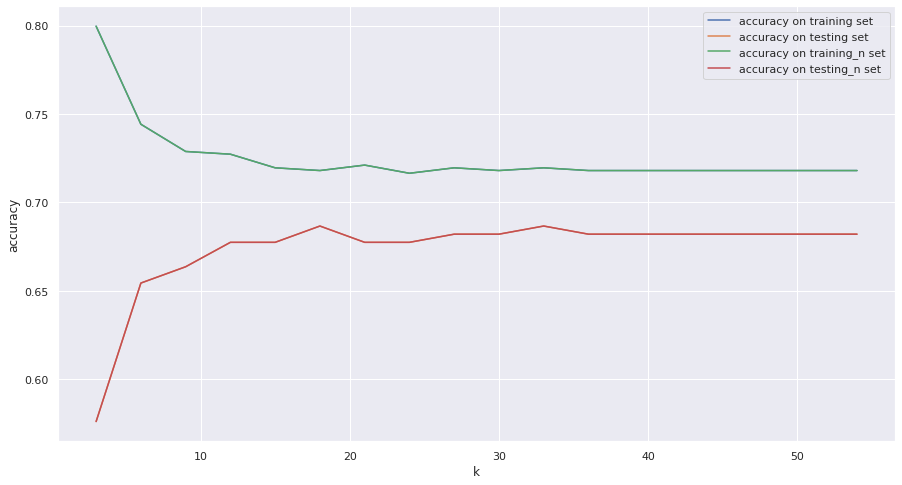

In [48]:
plt.plot( neighbors_settings, training_accuracy_binary, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy_binary, label="accuracy on testing set" )
plt.plot( neighbors_settings_n, training_accuracy_binary_n, label="accuracy on training_n set" )
plt.plot( neighbors_settings_n, test_accuracy_binary_n, label="accuracy on testing_n set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()
print("Маскимальное значение accuracy без нормализации %.4f" % max(test_accuracy_binary))
print("Маскимальное значение accuracy после нормализации %.4f" % max(test_accuracy_binary_n))

В данном случае, что с нормализацией, что без нормализации были абсолютно идентичные значения accuracy при выбранных k алгоритма KNN.

Выберем лучшиее значение гиперпараметра k=18 и выведем `classification_report` и `confusion_matrix`

In [49]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_binary_n, y_train_binary)
predictions_binary = knn.predict(X_test_binary_n)

In [50]:
print("kNN")
print(classification_report(y_test_binary, predictions_binary))

kNN
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       148
           1       1.00      0.01      0.03        69

    accuracy                           0.69       217
   macro avg       0.84      0.51      0.42       217
weighted avg       0.79      0.69      0.56       217



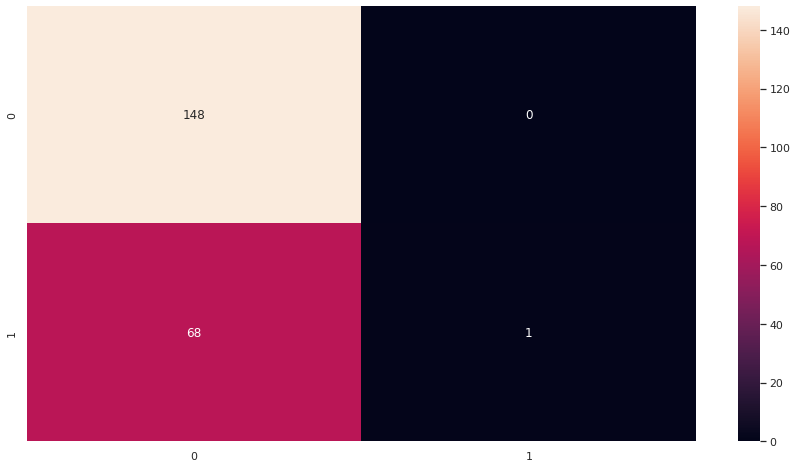

In [51]:
conf_matrix = confusion_matrix(y_test_binary, predictions_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d")


# **3. Использование нормализации признаков**

*В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.*

См. внутри заданий 1,2